In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
import numpy

train_path = "../data/origin/train.csv"
building_path = "../data/origin/building_info.csv"
train = pd.read_csv(train_path, encoding='utf-8')
building = pd.read_csv(building_path, encoding='utf-8')

ko2en_dict = {
 '건물번호': 'b_num',
 '일시': 'date',
 '기온(°C)': 'tmp',
 '강수량(mm)': 'rain',
 '풍속(m/s)': 'wind',
 '습도(%)': 'hum',
 '일조(hr)': 'sunshine',
 '일사(MJ/m2)': 'solar',
 '전력소비량(kWh)': 'power_consumption',
 '건물유형': 'b_type',
 '연면적(m2)': 'total_area',
 '냉방면적(m2)': 'cooling_area',
 '태양광용량(kW)': 'solar_capacity',
 'ESS저장용량(kWh)': 'ess_capacity',
 'PCS용량(kW)': 'pcs_capacity',
}

def rename_dataframe_columns(df, mapping_dict):
    return df.rename(columns=mapping_dict).copy()

train_df = rename_dataframe_columns(train, ko2en_dict)
train_df['datetime'] = pd.to_datetime(train['일시'], format='%Y%m%d %H')

# 요일 컬럼 추가 (0=월, 6=일)
train_df['weekday'] = train_df['datetime'].dt.weekday  # 숫자 요일
train_df['month'] = train_df['datetime'].dt.month
train_df['day'] = train_df['datetime'].dt.day
train_df['time'] = train_df['datetime'].dt.hour

train_df = train_df.drop("date", axis=1)
building_info_df = rename_dataframe_columns(building, ko2en_dict)

merge_df = pd.merge(train_df, building_info_df, on='b_num', how='left')
merge_df.head()

,num_date_time,b_num,tmp,rain,wind,hum,sunshine,solar,power_consumption,datetime,weekday,month,day,time,b_type,total_area,cooling_area,solar_capacity,ess_capacity,pcs_capacity
0,1_20240601 00,1,18.3,0.0,2.6,82.0,0.0,0.0,5794.80,2024-06-01 00:00:00,5,6,1,0,호텔,82912.71,77586.0,-,-,-
1,1_20240601 01,1,18.3,0.0,2.7,82.0,0.0,0.0,5591.85,2024-06-01 01:00:00,5,6,1,1,호텔,82912.71,77586.0,-,-,-
2,1_20240601 02,1,18.1,0.0,2.6,80.0,0.0,0.0,5338.17,2024-06-01 02:00:00,5,6,1,2,호텔,82912.71,77586.0,-,-,-
3,1_20240601 03,1,18.0,0.0,2.6,81.0,0.0,0.0,4554.42,2024-06-01 03:00:00,5,6,1,3,호텔,82912.71,77586.0,-,-,-
4,1_20240601 04,1,17.8,0.0,1.3,81.0,0.0,0.0,3602.25,2024-06-01 04:00:00,5,6,1,4,호텔,82912.71,77586.0,-,-,-


In [2]:
merge_df.columns

Index(['num_date_time', 'b_num', 'tmp', 'rain', 'wind', 'hum', 'sunshine',
       'solar', 'power_consumption', 'datetime', 'weekday', 'month', 'day',
       'time', 'b_type', 'total_area', 'cooling_area', 'solar_capacity',
       'ess_capacity', 'pcs_capacity'],
      dtype='object')

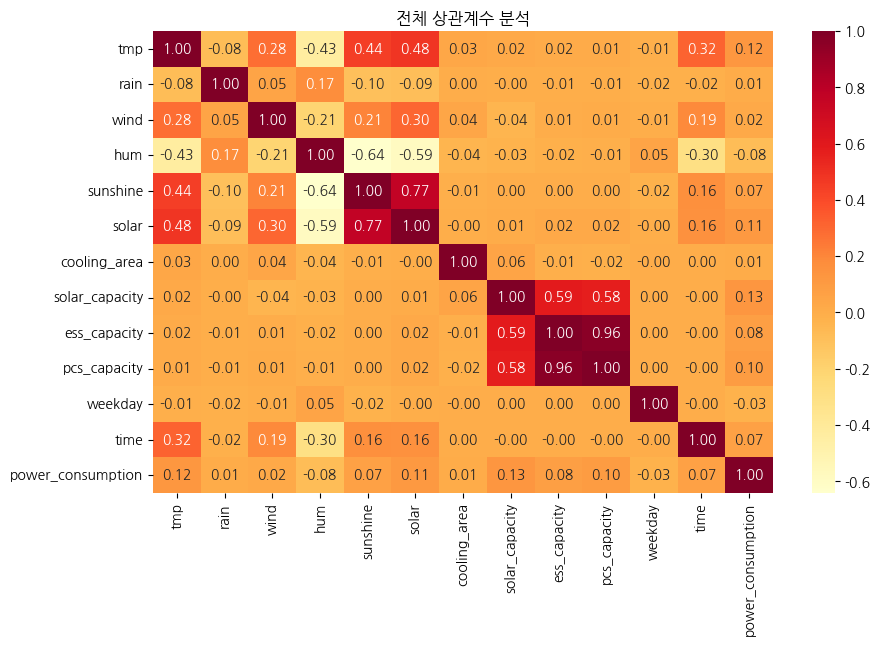

전체 상관계수 순위
solar_capacity    0.133
tmp               0.124
solar             0.110
pcs_capacity      0.096
hum               0.083
ess_capacity      0.078
time              0.070
sunshine          0.066
weekday           0.025
wind              0.022
cooling_area      0.012
rain              0.009


In [3]:
# 전체 상관계수 파악
def make_corr(cols, df):
    result = df[cols].replace("-", 0)
    corr = result.corr()
    return corr

total_corr_list = [
    'tmp', 'rain', 'wind', 'hum', 'sunshine', 'solar',
    'cooling_area', 'solar_capacity', 'ess_capacity',
    'pcs_capacity','weekday', 'time', 'power_consumption'
]

total_corr = make_corr(total_corr_list, merge_df)
plt.figure(figsize=(10,6))
plt.title("전체 상관계수 분석")
sns.heatmap(total_corr, annot=True, cmap='YlOrRd', fmt=".2f")
plt.show()

ranking = (
    total_corr["power_consumption"]
    .drop("power_consumption")
    .abs() 
    .sort_values(ascending=False)
)
print("전체 상관계수 순위")
print(ranking.round(3).to_string())

### 용도별 데이터 프레임 생성

C:\Users\gd980\AppData\Local\Temp\ipykernel_1284\861734084.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = df[cols].replace("-", 0)


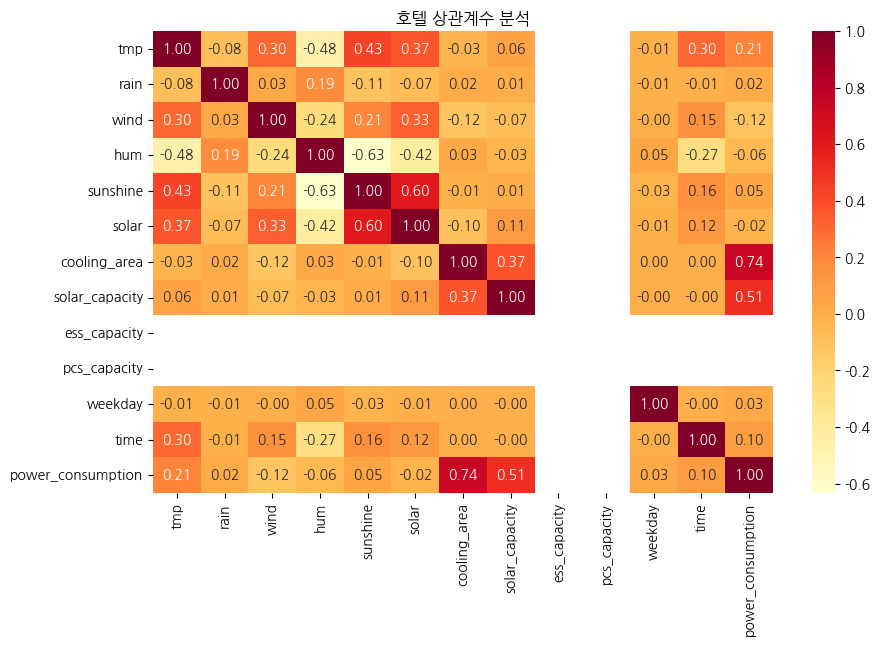

C:\Users\gd980\AppData\Local\Temp\ipykernel_1284\2264150399.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ranking_dfs = pd.concat([ranking_dfs, row_df], ignore_index=True)
C:\Users\gd980\AppData\Local\Temp\ipykernel_1284\861734084.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = df[cols].replace("-", 0)


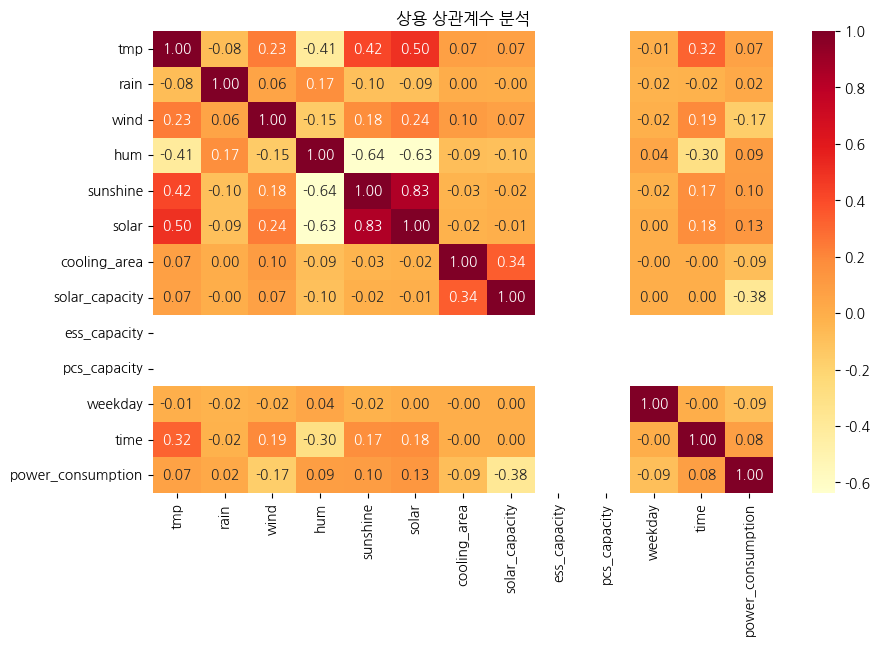

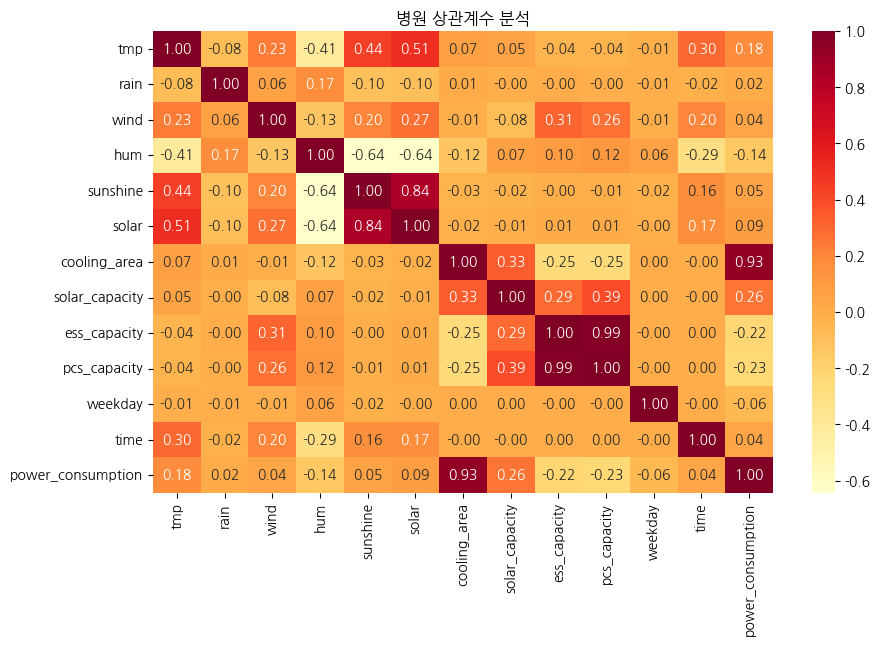

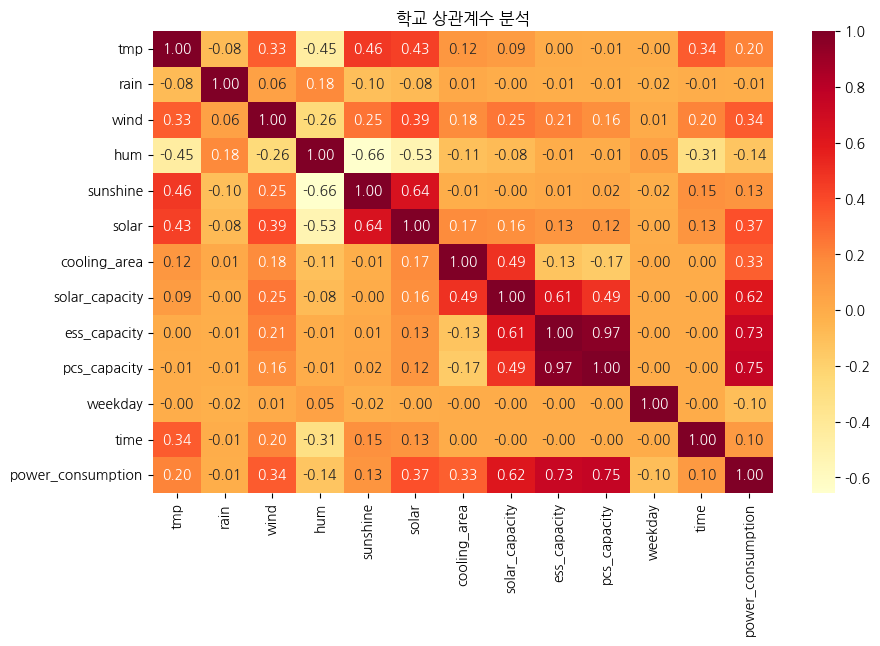

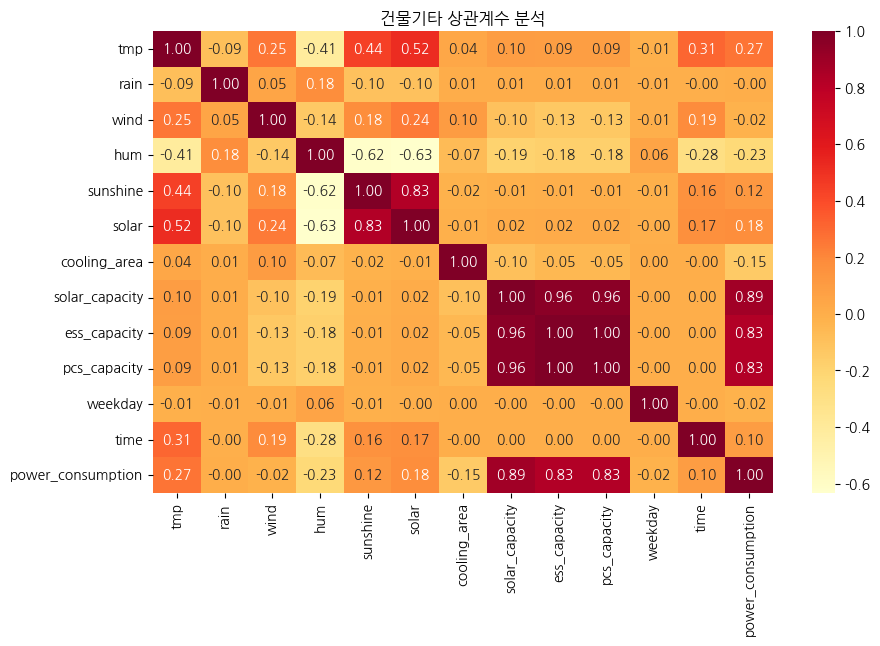

C:\Users\gd980\AppData\Local\Temp\ipykernel_1284\861734084.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = df[cols].replace("-", 0)


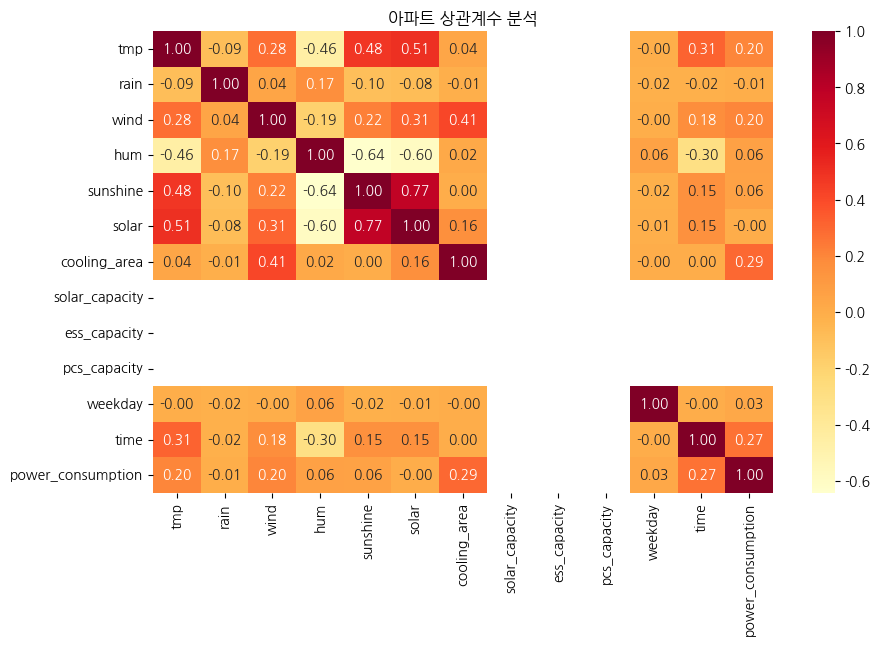

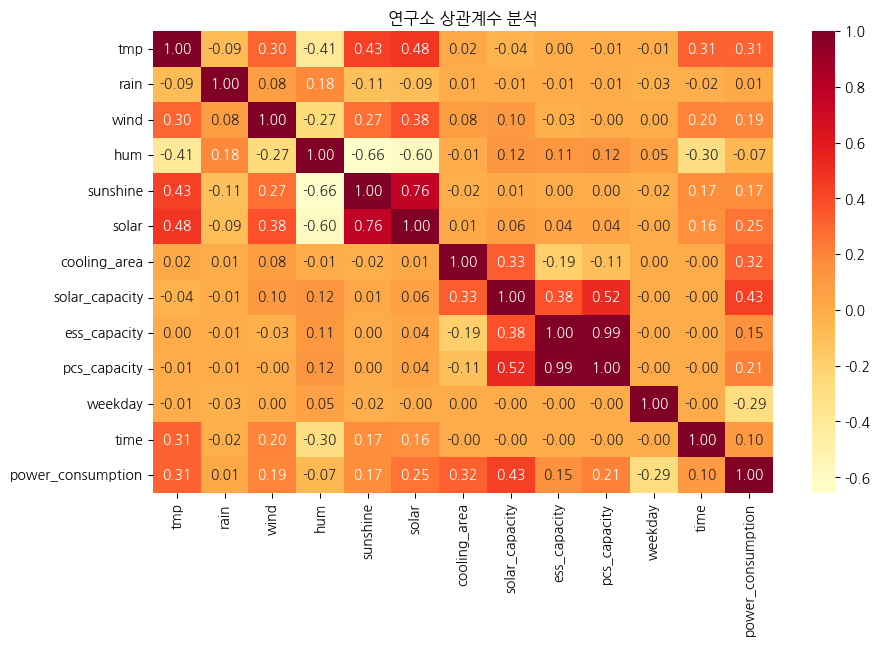

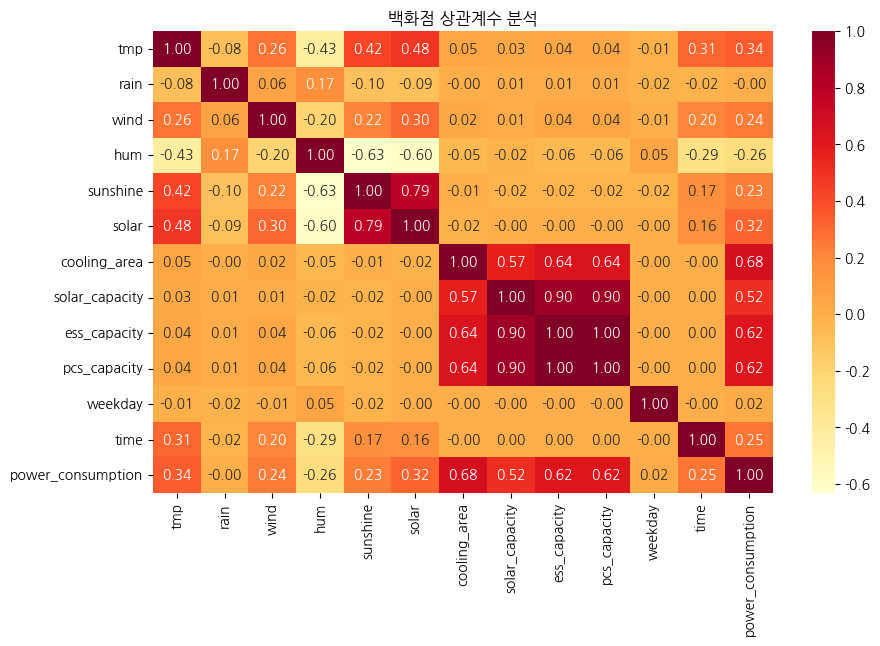

C:\Users\gd980\AppData\Local\Temp\ipykernel_1284\861734084.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = df[cols].replace("-", 0)


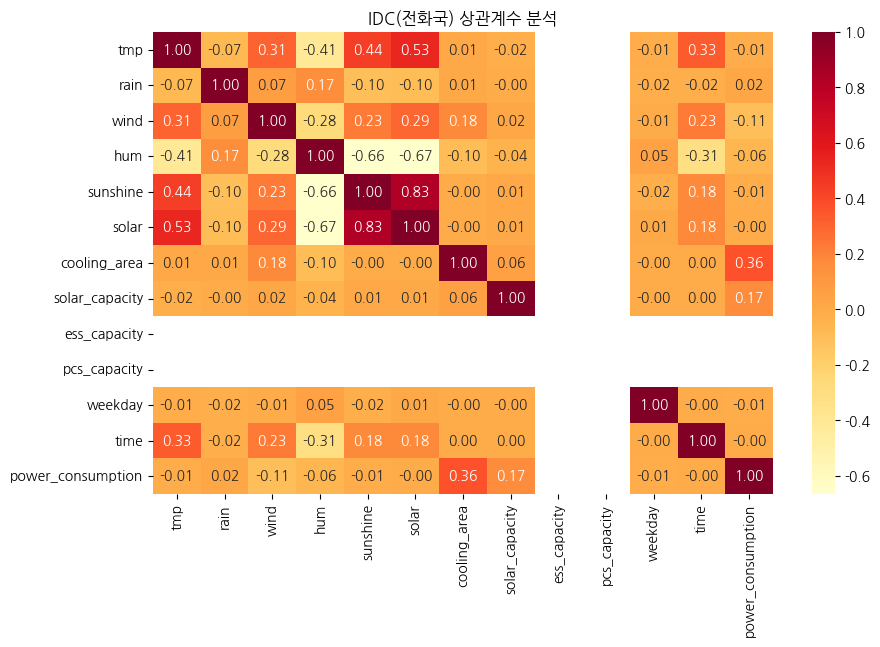

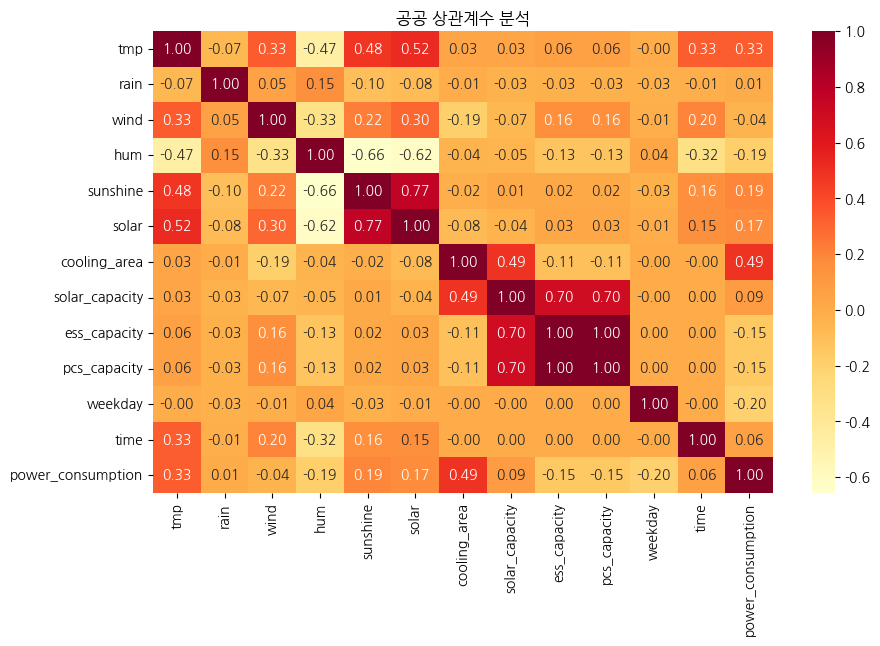

,b_type,tmp,rain,wind,hum,sunshine,solar,cooling_area,solar_capacity,ess_capacity,pcs_capacity,weekday,time,power_consumption
0,호텔,0.210,0.015,-0.116,-0.056,0.053,-0.022,0.744,0.512,NaN,NaN,0.031,0.095,1.0
1,상용,0.066,0.024,-0.165,0.089,0.097,0.127,-0.086,-0.375,NaN,NaN,-0.090,0.082,1.0
2,병원,0.184,0.017,0.043,-0.139,0.052,0.087,0.935,0.258,-0.225,-0.233,-0.062,0.037,1.0
3,학교,0.202,-0.011,0.336,-0.136,0.129,0.373,0.326,0.617,0.730,0.751,-0.098,0.095,1.0
4,건물기타,0.265,-0.001,-0.020,-0.232,0.122,0.181,-0.148,0.886,0.831,0.831,-0.016,0.100,1.0
5,아파트,0.198,-0.005,0.198,0.063,0.063,-0.001,0.295,NaN,NaN,NaN,0.028,0.267,1.0
6,연구소,0.313,0.012,0.192,-0.073,0.170,0.254,0.316,0.431,0.148,0.210,-0.291,0.096,1.0
7,백화점,0.345,-0.000,0.241,-0.261,0.235,0.316,0.680,0.515,0.618,0.618,0.017,0.255,1.0
8,IDC(전화국),-0.012,0.018,-0.111,-0.063,-0.009,-0.001,0.365,0.172,NaN,NaN,-0.014,-0.005,1.0
9,공공,0.330,0.006,-0.044,-0.189,0.193,0.173,0.487,0.094,-0.149,-0.147,-0.204,0.057,1.0


In [4]:
change_name = ['hotel', 'commercial', 'hospital', 'school', 'etc', 'apart', 'research', 'store', 'idc','public']
corr_list = [
    'tmp', 'rain', 'wind', 'hum', 'sunshine', 'solar',
    'cooling_area', 'solar_capacity', 'ess_capacity',
    'pcs_capacity','weekday', 'time', 'power_consumption'
]

df_dict = {}
ranking_dfs = pd.DataFrame(columns=['b_type'] + corr_list)

for i, tp in enumerate(merge_df['b_type'].unique()):
    name = change_name[i]
    df_dict[name] = merge_df[merge_df['b_type'] == tp].reset_index(drop=True)

    corr = make_corr(corr_list, df_dict[name])
    plt.figure(figsize=(10,6))
    plt.title(f"{tp} 상관계수 분석")
    sns.heatmap(corr, annot=True, cmap='YlOrRd', fmt=".2f")
    plt.show()

    row_df = corr.loc[corr_list, 'power_consumption'].round(3).to_frame().T
    row_df['b_type'] = tp

    ranking_dfs = pd.concat([ranking_dfs, row_df], ignore_index=True)

display(ranking_dfs)

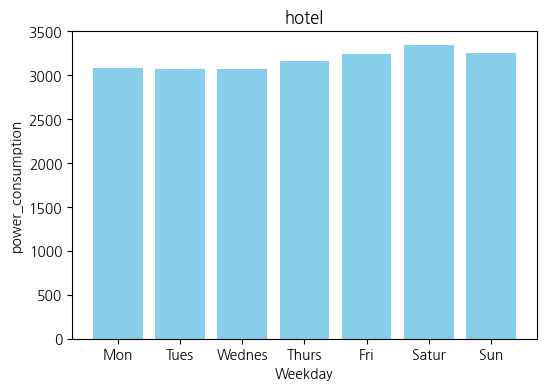

hotel
평일 : 0.141
주말 : 0.148


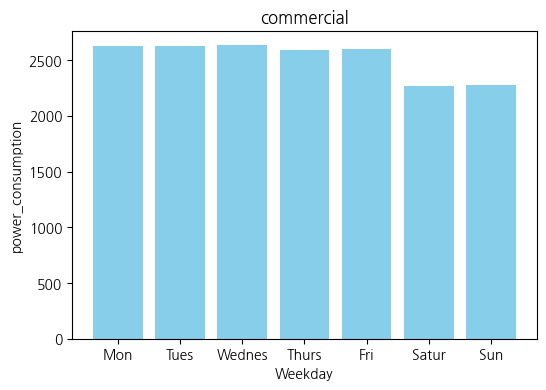

commercial
평일 : 0.148
주말 : 0.129


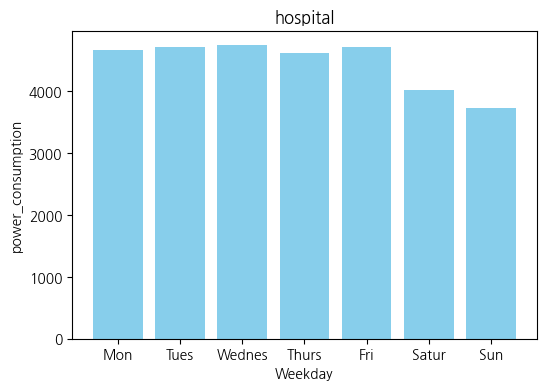

hospital
평일 : 0.150
주말 : 0.124


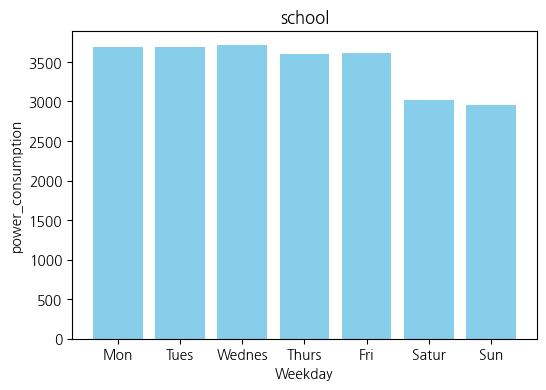

school
평일 : 0.151
주말 : 0.123


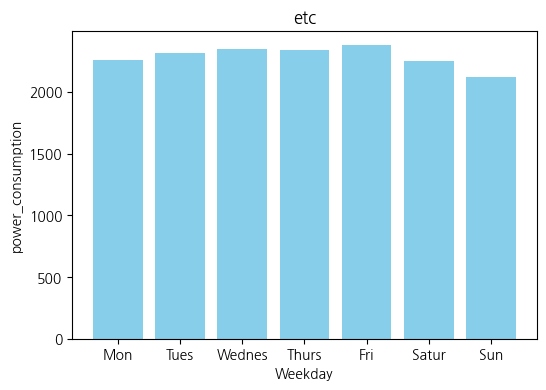

etc
평일 : 0.145
주말 : 0.137


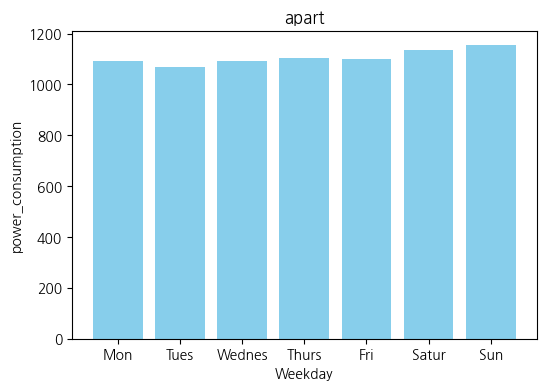

apart
평일 : 0.141
주말 : 0.148


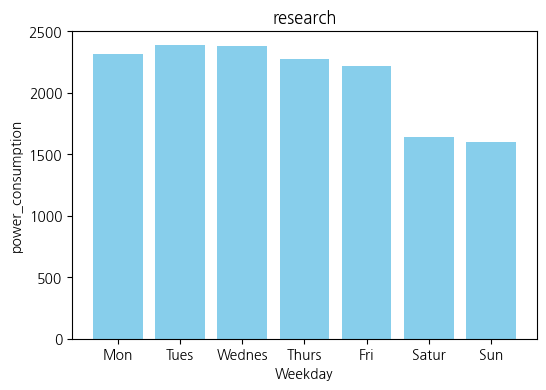

research
평일 : 0.156
주말 : 0.109


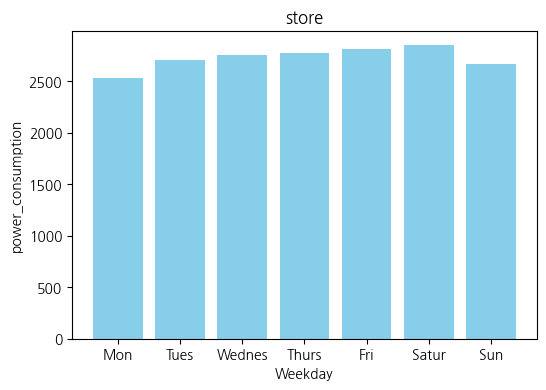

store
평일 : 0.142
주말 : 0.144


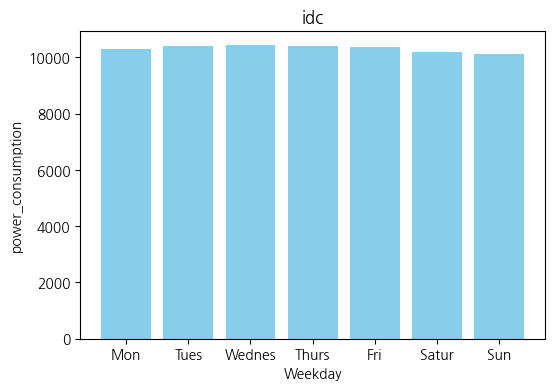

idc
평일 : 0.144
주말 : 0.141


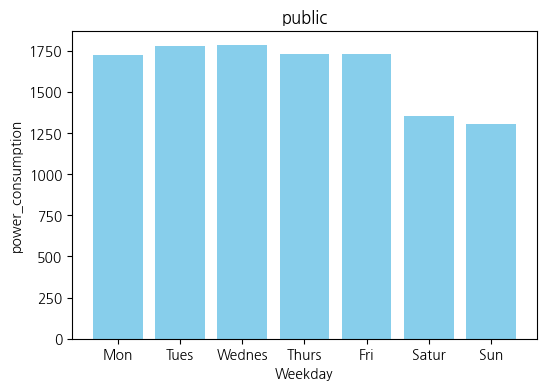

public
평일 : 0.153
주말 : 0.117


In [5]:
for key in df_dict.keys():
    gb = df_dict[key].groupby(['weekday']).mean(numeric_only=True)
    x_labels = ["Mon", "Tues", "Wednes", "Thurs", "Fri", "Satur", "Sun"]
    plt.figure(figsize=(6, 4))
    plt.bar(x_labels, gb['power_consumption'], color='skyblue')
    
    plt.title(f"{key}")
    plt.xlabel('Weekday')
    plt.ylabel('power_consumption')
    plt.show()
    print(key)
    total = sum(gb['power_consumption'])
    workday = (sum(gb['power_consumption'].iloc[0:5])/5)/sum(gb['power_consumption']) 
    holiday = (sum(gb['power_consumption'].iloc[5:])/2)/sum(gb['power_consumption']) 
    print(f"평일 : {workday:.3f}")
    print(f"주말 : {holiday:.3f}")


In [6]:
df_dict['apart'].describe()
# wind ~1, 1~2 2~3 3~ 으로 범주화
# weekday 일부는 주말과 평일로 분류 나머지는 drop
# rain, weekday, month, day, total_area drop 예정 

for key in df_dict.keys():
    drop_list = []
    gb = df_dict[key].groupby(['weekday']).mean(numeric_only=True)

    total = sum(gb['power_consumption'])
    workday = (sum(gb['power_consumption'].iloc[0:5])/5)/sum(gb['power_consumption']) 
    holiday = (sum(gb['power_consumption'].iloc[5:])/2)/sum(gb['power_consumption'])
    if workday - holiday > 0.018:
        df_dict[key]['week'] = df_dict[key]['weekday'].apply(lambda x: 0 if x < 5 else 1)
        print(key)

commercial
hospital
school
research
public


In [7]:
print(list(merge_df.columns))
merge_df[['tmp', 'rain', 'wind', 'hum', 'sunshine', 'solar', 'power_consumption', 'datetime', 'weekday', 'month', 'day', 'time','total_area', 'cooling_area', 'solar_capacity', 'ess_capacity', 'pcs_capacity']].describe()

['num_date_time', 'b_num', 'tmp', 'rain', 'wind', 'hum', 'sunshine', 'solar', 'power_consumption', 'datetime', 'weekday', 'month', 'day', 'time', 'b_type', 'total_area', 'cooling_area', 'solar_capacity', 'ess_capacity', 'pcs_capacity']


,tmp,rain,wind,hum,sunshine,solar,power_consumption,datetime,weekday,month,day,time,total_area,cooling_area
count,204000.000000,204000.000000,204000.000000,204000.000000,204000.000000,204000.000000,204000.000000,204000,204000.000000,204000.000000,204000.000000,204000.000000,2.040000e+05,2.040000e+05
mean,26.098130,0.304185,1.967977,75.206706,0.277459,0.702752,3329.575857,2024-07-13 11:30:00.000000512,3.023529,6.929412,14.835294,11.500000,1.857529e+05,1.091272e+05
min,8.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2024-06-01 00:00:00,0.000000,6.000000,1.000000,0.000000,1.003542e+04,3.378400e+02
25%,23.500000,0.000000,1.000000,64.000000,0.000000,0.000000,1176.120000,2024-06-22 05:45:00,1.000000,6.000000,8.000000,5.750000,5.698032e+04,2.595468e+04
50%,26.300000,0.000000,1.800000,78.000000,0.000000,0.050000,1935.720000,2024-07-13 11:30:00,3.000000,7.000000,15.000000,11.500000,1.049387e+05,6.433699e+04
75%,28.800000,0.000000,2.700000,88.000000,0.600000,1.230000,3726.765000,2024-08-03 17:15:00,5.000000,8.000000,22.000000,17.250000,2.027810e+05,1.243468e+05
max,38.700000,100.900000,15.200000,100.000000,1.000000,3.950000,27155.940000,2024-08-24 23:00:00,6.000000,8.000000,31.000000,23.000000,3.260213e+06,1.956128e+06
std,4.052888,2.052947,1.316102,16.378490,0.396476,1.017394,3689.102792,NaN,1.999866,0.793923,8.446178,6.922204,3.373847e+05,2.066793e+05


In [8]:
# 1. "-" 치환하고 숫자 변환
apart = df_dict['apart'].replace("-", 0)
apart = apart.apply(pd.to_numeric, errors='coerce')

# 2. NaN 채우기
apart = apart.fillna(0)

# 3. 분석에 필요 없는 컬럼 제거
apart = apart.drop(['num_date_time','datetime', 'weekday', 'month', 'day', 'time', 'b_type'], axis=1)

# 4. groupby 집계
gb = apart.groupby(['cooling_area','b_num']).mean(numeric_only=True)
display(gb)

C:\Users\gd980\AppData\Local\Temp\ipykernel_1284\3167847628.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  apart = df_dict['apart'].replace("-", 0)


,,tmp,rain,wind,hum,sunshine,solar,power_consumption,total_area,solar_capacity,ess_capacity,pcs_capacity
cooling_area,b_num,,,,,,,,,,,
22210.390,93,25.364510,0.334608,1.166471,78.043627,0.281618,0.000000,1500.017294,308165.640,0.0,0.0,0.0
122153.000,31,25.760245,0.327108,2.025833,75.330392,0.279853,0.785309,793.054853,186132.260,0.0,0.0,0.0
131500.000,71,25.817353,0.349265,1.352108,76.029412,0.274559,0.801623,1113.928941,228427.470,0.0,0.0,0.0
183315.469,65,27.121667,0.272941,2.006176,68.314706,0.291127,0.819956,37.243054,300496.816,0.0,0.0,0.0
233263.000,11,26.381225,0.316520,1.802353,72.286275,0.287108,0.806181,1191.057529,271233.000,0.0,0.0,0.0
243493.983,91,26.257696,0.255098,1.467598,80.889706,0.262010,0.769132,1615.810000,364652.770,0.0,0.0,0.0
247380.000,25,26.566716,0.186422,2.510098,70.458333,0.324314,0.844608,1235.223265,340630.000,0.0,0.0,0.0
252257.000,85,26.926765,0.231324,2.120441,78.083824,0.239902,0.773701,26.259946,252313.000,0.0,0.0,0.0
415124.587,70,25.719657,0.302941,3.609167,78.663725,0.283039,0.837054,2444.187059,492485.514,0.0,0.0,0.0


In [9]:
display(df_dict['apart'][df_dict['apart']['b_num'] == 65])

,num_date_time,b_num,tmp,rain,wind,hum,sunshine,solar,power_consumption,datetime,weekday,month,day,time,b_type,total_area,cooling_area,solar_capacity,ess_capacity,pcs_capacity
6120,65_20240601 00,65,22.1,0.0,2.3,52.0,0.0,0.00,51.13,2024-06-01 00:00:00,5,6,1,0,아파트,300496.816,183315.469,-,-,-
6121,65_20240601 01,65,21.5,0.0,2.7,55.0,0.0,0.00,41.39,2024-06-01 01:00:00,5,6,1,1,아파트,300496.816,183315.469,-,-,-
6122,65_20240601 02,65,20.8,0.0,1.8,57.0,0.0,0.00,36.54,2024-06-01 02:00:00,5,6,1,2,아파트,300496.816,183315.469,-,-,-
6123,65_20240601 03,65,20.3,0.0,2.2,54.0,0.0,0.00,32.79,2024-06-01 03:00:00,5,6,1,3,아파트,300496.816,183315.469,-,-,-
6124,65_20240601 04,65,19.8,0.0,1.9,49.0,0.0,0.00,31.82,2024-06-01 04:00:00,5,6,1,4,아파트,300496.816,183315.469,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8155,65_20240824 19,65,33.0,0.0,2.2,50.0,0.5,0.19,41.83,2024-08-24 19:00:00,5,8,24,19,아파트,300496.816,183315.469,-,-,-
8156,65_20240824 20,65,31.5,0.0,1.7,58.0,0.0,0.00,46.73,2024-08-24 20:00:00,5,8,24,20,아파트,300496.816,183315.469,-,-,-
8157,65_20240824 21,65,30.6,0.0,0.8,61.0,0.0,0.00,44.88,2024-08-24 21:00:00,5,8,24,21,아파트,300496.816,183315.469,-,-,-
8158,65_20240824 22,65,29.9,0.0,0.5,63.0,0.0,0.00,48.86,2024-08-24 22:00:00,5,8,24,22,아파트,300496.816,183315.469,-,-,-


C:\Users\gd980\AppData\Local\Temp\ipykernel_1284\1374357089.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  a = a.replace("-", np.nan).apply(pd.to_numeric, errors='coerce')


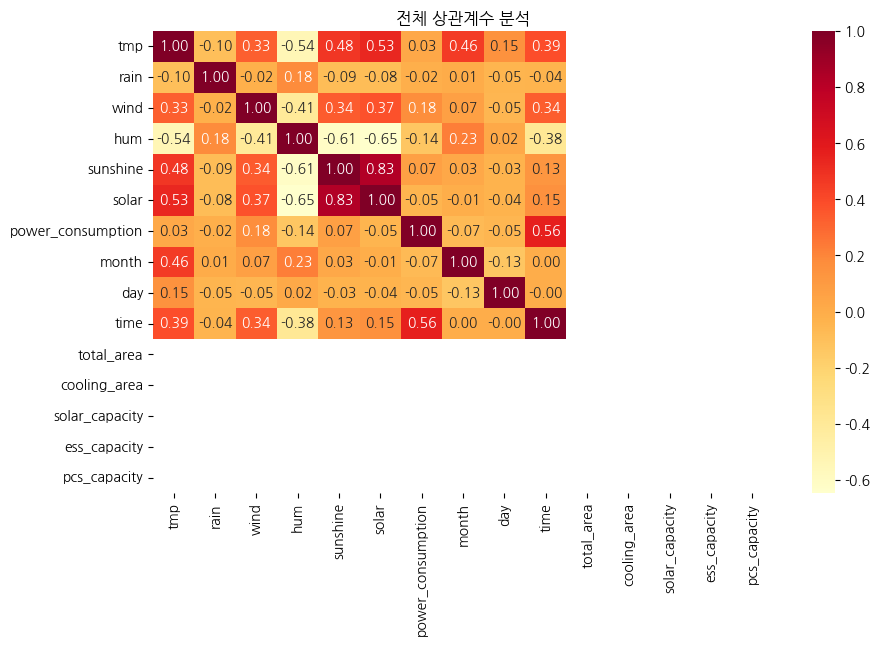

전체 상관계수 순위
time              0.564
wind              0.175
hum               0.136
sunshine          0.073
month             0.069
day               0.051
solar             0.046
tmp               0.027
rain              0.016
total_area          NaN
cooling_area        NaN
solar_capacity      NaN
ess_capacity        NaN
pcs_capacity        NaN


In [22]:
import numpy as np
a = df_dict['apart'][df_dict['apart']['b_num'] == 65].copy()
a = a.drop(['num_date_time','b_num','b_type','datetime','weekday'], axis=1)

# "-" → NaN 치환 후 숫자로 변환
a = a.replace("-", np.nan).apply(pd.to_numeric, errors='coerce')

corr = a.corr(numeric_only=True)

plt.figure(figsize=(10,6))
plt.title("전체 상관계수 분석")
sns.heatmap(corr, annot=True, cmap='YlOrRd', fmt=".2f")
plt.show()

ranking = (
    corr["power_consumption"]
    .drop("power_consumption")
    .abs()
    .sort_values(ascending=False)
)
print("전체 상관계수 순위")
print(ranking.round(3).to_string())
